# **Сегментация пользователей**

**Заказчик** \
НКО, способствующая продвижению донорского движения в РФ и мотивирующая людей становиться донорами   

**Цель исследования** \
Изучение поведения доноров для выделения однородных сегментов в зависимости от давности и суммы донаций каждого донора с дальнейшей детализацией индивидуальных сегментов и разработкой рекомендаций по взаимодействию с каждой категорией

**Описание данных** \
Анализ проводится на основе двух датасетов с данными о донациях и донорах, их совершивших

## 1. Изучение общей информации, предобработка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from datetime import date,timedelta, datetime

pd.set_option('max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
import warnings; warnings.filterwarnings(action = 'ignore') 

In [2]:
# Читаем CSV-файлы с данными
users = pd.read_csv('users.csv', parse_dates=['Дата_рождения', 'Дата_регистрации'])

donations = pd.read_csv('donations.csv', parse_dates=['donation_date', 'addition_date'])

In [3]:
# Выводим таблицы и общую информацию о них
for data in [users, donations]: 
    display(data.sample(1))
    print()
    display(data.info())
    print()
    display(data.isna().sum())
    print()
    print('Количество дубликатов в датасете:', data.duplicated().sum())
    print()

,user_id,Пол,Дата_рождения,Регион,Группа_крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный_донор,Отвод_от_донации,Цельная_кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата_регистрации,Не_подтверждённые_донации,Прошедших_донаций,Донаций_до_регистрации,Последняя_активность,Теги,Указан_email,Указан_телефон,Авторизация_через_ВК,Авторизация_через_Одноклассники,Авторизация_через_Твиттер,Авторизация_через_Яндекс,Авторизация_через_Гугл,Подтверждённые_донации,Получен_значок_20,Получен_значок_100,Донаций_на_момент_регистрации,Количество_взятых_бонусов,Дата_получения_почетного_донора,Подтвержденный_почетный_донор,Предполагаемая_дата_получения_почетного_донора
52261,221131,NaN,NaT,"Россия, Башкортостан, Уфа",NaN,NaN,Да,Да,Да,Да,Да,Нет,23.04.2024,Нет,1,0,0,0,0,2022-09-16,1,1,NaN,2022-09-16,NaN,да,нет,нет,нет,нет,нет,да,1,нет,нет,NaN,0,NaN,0,2024-04-23



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265474 entries, 0 to 265473
Data columns (total 40 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   user_id                                         265474 non-null  int64         
 1   Пол                                             103645 non-null  object        
 2   Дата_рождения                                   92547 non-null   datetime64[ns]
 3   Регион                                          165061 non-null  object        
 4   Группа_крови                                    51967 non-null   object        
 5   Kell-фактор                                     44538 non-null   object        
 6   Цельная кровь                                   265474 non-null  object        
 7   Плазма                                          265474 non-null  object        
 8   Тромбоциты                       

None

user_id                                                0
Пол                                               161829
Дата_рождения                                     172927
Регион                                            100413
Группа_крови                                      213507
Kell-фактор                                       220936
Цельная кровь                                          0
Плазма                                                 0
Тромбоциты                                             0
Эритроциты                                             0
Лейкоциты                                              0
Костный мозг                                           0
Почетный_донор                                         0
Отвод_от_донации                                       0
Цельная_кровь.1                                        0
Плазма.1                                               0
Тромбоциты.1                                           0
Эритроциты.1                   


Количество дубликатов в датасете: 0



,id,user_id,blood_class,donation_date,planned_date,donation_type,city,region,country,donation_place,certificate,addition_date,status
180705,69746,8789,Цельная кровь,2013-08-30,NaN,Безвозмездно,Санкт-Петербург,Не указан,Россия,Городская станция переливания крови Санкт-Пете...,Да,2020-11-18,Принята



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247783 entries, 0 to 247782
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              247783 non-null  int64         
 1   user_id         247783 non-null  int64         
 2   blood_class     247783 non-null  object        
 3   donation_date   247783 non-null  datetime64[ns]
 4   planned_date    12139 non-null   object        
 5   donation_type   247783 non-null  object        
 6   city            247783 non-null  object        
 7   region          247783 non-null  object        
 8   country         247783 non-null  object        
 9   donation_place  247783 non-null  object        
 10  certificate     247783 non-null  object        
 11  addition_date   247783 non-null  datetime64[ns]
 12  status          247783 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 24.6+ MB


None

id                     0
user_id                0
blood_class            0
donation_date          0
planned_date      235644
donation_type          0
city                   0
region                 0
country                0
donation_place         0
certificate            0
addition_date          0
status                 0
dtype: int64


Количество дубликатов в датасете: 0



In [4]:
# Выводим количество уникальных доноров
print('Количество уникальных доноров в таблице о пользователях - ', users.user_id.nunique(),', о донациях - ', donations.user_id.nunique())

Количество уникальных доноров в таблице о пользователях -  265474 , о донациях -  46060


In [5]:
# Создаем копию датасета о донациях для дальнейших манипуляций
donations_rm = donations.copy()

#Выделяем донации, сделанные за пределами РФ
non_rus_regions=['Гомельская область', 'Западно-Казахстанская область', 'Полтавская область', 'Одесская область',\
                 'Минская область', 'Павлодарская область','Кзыл-Ординская область', 'Витебская область', 'Карагандинская область', \
                 'Киевская область', 'Актюбинская область', 'Ровенская область', 'Брестская область', 'Черкасская область', \
                 'Днепропетровская область', 'Могилевская область','Атырауская область', 'Черниговская область','Гродненская область', \
                 'Мангистауская область','Кустанайская область', 'Сумская область','Львовская область', 'Восточно-Казахстанская область',\
                 'Николаевская область', 'Винницкая область', 'Закарпатская область', 'Житомирская область','Акмолинская область', \
                 'Жамбылская  область', 'Запорожская область', 'Волынская область','Кировоградская область', 'Тернопольская область', \
                 'Черновицкая область', 'Хмельницкая область', 'Ивано-Франковская область', 'Навоийская', 'Северо-Казахстанская область', 'Харьковская область']

print('Количество донаций вне РФ: ', len(donations_rm.query('region in @non_rus_regions')), \
      ', со статусом "Удалена" и "Отклонена"', len(donations_rm.query('status == ["Удалена", "Отклонена"]')))

Количество донаций вне РФ:  4382 , со статусом "Удалена" и "Отклонена" 6748


In [6]:
# Исключаем из датасета донации вне РФ или со статусом "Удалена" и "Отклонена"
donations_rm=donations.query("status != ['Удалена', 'Отклонена'] and region not in @non_rus_regions and \
                             city != ['Кишинев', 'Алма-Ата', 'Ташкент', 'Тирасполь', 'Харьковская область', 'Тбилиси','Астана', 'Бишкек', \
                             'Комрат', 'Бельцы', 'Кагул', 'Ереван', 'Бендеры', 'Düsseldorf', 'Tallinn']")

print('Количество удаленных запсией:', donations.shape[0]-donations_rm.shape[0], 'из', donations.shape[0])

Количество удаленных запсией: 11725 из 247783


In [7]:
# Выводим количество уникальных пользователей в данных о донациях
donations_rm.user_id.nunique()

43471

**Комментарий:** В исследовании используются два датафрейма: с общими данными о пользователях (265474 уникальных пользователя) и о донациях (247783 кровосдач, совершенных 46060 уникальными донорами). Отмечаем значительное количество пропусков в столбцах с демографической информацией (пол, возраст, регион проживания, резус-фактор и д р), обусловленное необязательностью предоставления этой информации при регистрации. Заполнение пропусков не является целесообразным. Из датафрейма с донациями были удалены 11725 записей о донациях за пределами РФ и со статусом "Удалена" и "Отклонена". Количество исследуемых уникальных доноров составило 43471 человек, донаций -  247783 штук 

## 2. RM-анализ

### 2.1 Создание rm-таблицы

In [8]:
# Вычисляем количество дней с момента последней донации
donations_rm['time_to_last_don'] = ((donations_rm['donation_date'].max() - donations_rm['donation_date']) + timedelta(days=1)).dt.days

# Создаем rm-таблицу
rm_table = donations_rm.groupby('user_id').agg({'time_to_last_don': lambda x: x.min(), 
                                             'id': lambda x: len(x)}).reset_index()

# Переименуем столбцы 
rm_table.rename(columns={'time_to_last_don': 'recency',       # дата с момента последней донации
                          'id': 'monetary'}, inplace=True)    # сумма донаций донора
rm_table.head(3)

,user_id,recency,monetary
0,4,1234,1
1,7,1193,1
2,8,1193,3


### 2.1.1 Работа с выбросами в столбцах recency и monetary

In [9]:
# Выводим статистическую информацию по столбцу recency (разница между максимальной датой датасета и датой последней сдачи в днях)
rm_table['recency'].describe().astype(int)

count    43471
mean      1446
std       1319
min          1
25%        288
50%        868
75%       2671
max      15261
Name: recency, dtype: int32

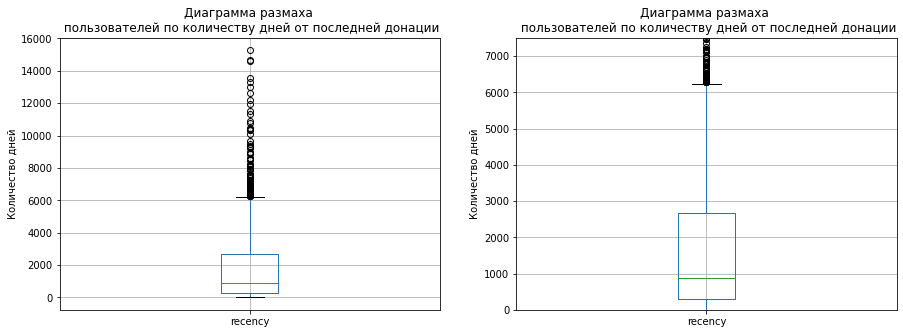

In [10]:
#Строим диаграмму размаха распределения пользователей по количеству дней от последней донации
fig, ax = plt.subplots(1, 2, figsize=(15,5))

rm_table.boxplot(column='recency', ax=ax[0])\
         .set(title='Диаграмма размаха \n пользователей по количеству дней от последней донации',
             ylabel ='Количество дней')

rm_table.boxplot(column='recency', ax=ax[1]).set(title='Диаграмма размаха \n пользователей по количеству дней от последней донации',\
                                                ylabel='Количество дней', ylim=(0, 7500))
plt.show()

In [11]:
# Выводим границы значений, выходящих за пределы 1% (т е менее 0.01 и более 0.99 перцентиля)
recency_perc=np.percentile(rm_table['recency'], [1, 99]).astype(int)
recency_perc

array([   9, 4510])

In [12]:
# Выводим статистическую информацию по столбцу monetary (сумма донаций пользователя)
rm_table['monetary'].describe().astype(int)

count    43471
mean         5
std         12
min          1
25%          1
50%          1
75%          4
max        361
Name: monetary, dtype: int32

In [13]:
# Выводим количество пользователей с одной донацией
print('Количество пользователей с одной донацией:', len(rm_table[rm_table['monetary']==1]))

# Расчитываем долю пользователей с одной покупкой
print('Доля таких строк от общего:', round(len(rm_table[rm_table['monetary']==1])/ rm_table.shape[0] * 100, 2), '%')

Количество пользователей с одной донацией: 22768
Доля таких строк от общего: 52.38 %


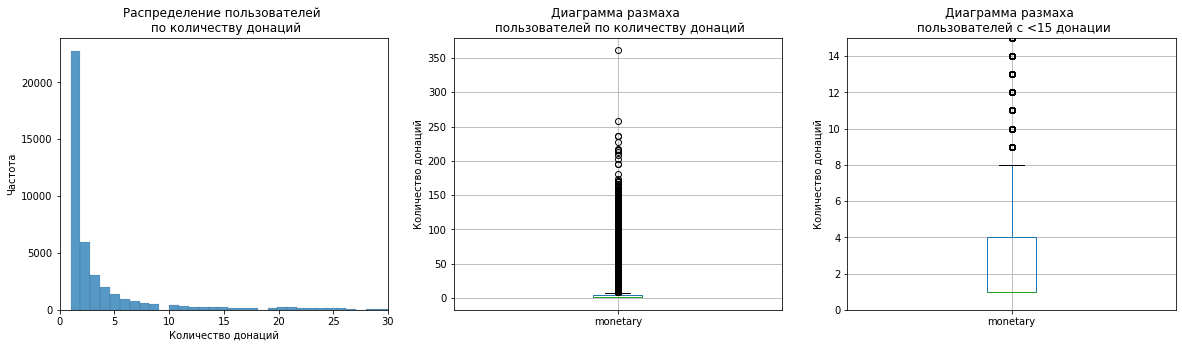

In [14]:
#Строим гистограмму и диаграмму размаха распределения пользователей по количеству донаций

fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(x='monetary', data=rm_table, ax=ax[0], bins=400)\
               .set(xlim=(0, 30), title='Распределение пользователей \n по количеству донаций', xlabel='Количество донаций', ylabel='Частота')

rm_table.boxplot(column='monetary', ax=ax[1])\
         .set(title='Диаграмма размаха \n пользователей по количеству донаций', ylabel='Количество донаций')

rm_table.boxplot(column='monetary', ax=ax[2]).set(title='Диаграмма размаха \n пользователей с <15 донации',\
                                                  ylabel='Количество донаций', ylim=(0, 15))
plt.show()

In [15]:
# Выводим границы значений, выходящих за пределы 1% (т е менее 0.01 и более 0.99 перцентиля)
np.percentile(rm_table['monetary'], [1, 99]).astype(int)

array([ 1, 56])

In [16]:
# Удаляем выбивающиеся значения в recency
rm_table2 = rm_table.query('recency <= @recency_perc[1]')

# Удаляем выбивающиеся значения в monetary
rm_table2 = rm_table2.query('monetary<=200')

# Считаем количество и долю удаленных строк
print(f'Количество строк уменьшилось на {rm_table.shape[0] - rm_table2.shape[0]} и составляет {rm_table2.shape[0]}')
print(f'Доля удаленных строк составляет {(rm_table.shape[0] - rm_table2.shape[0])/rm_table.shape[0]:.2%}')

Количество строк уменьшилось на 446 и составляет 43025
Доля удаленных строк составляет 1.03%


In [17]:
# Удаляем аномальных пользователей, обнаруженных в столбцах recency и monetary rm-таблицы, из таблицы донаций
donations_rm =donations_rm.query('user_id in @rm_table2.user_id')

In [18]:
# Выводим получившуюся rm таблицу
rm_table2.head(3)

,user_id,recency,monetary
0,4,1234,1
1,7,1193,1
2,8,1193,3


**Комментарий:** Изучив статистические данные и выходящие за 1% значения в столбцах recency и monetary, принято решение отсечь доноров с 200 и более донациями, а также тех, чья последняя сдача была более 4510 дней назад (по 99 перцентилю). Количество исследуемых уникальных пользователей сократилось на 446 (1.03%) и составило 43025 человек. Отмечаем, что больше половины доноров сдавали кровь лишь однажды. 

### 2.2 Деление всей выборки на 3 части

In [19]:
# Выводим границы значений при делении значений на 3 равные группы методом qcut
display(pd.qcut(rm_table2['recency'], 3).unique())

pd.qcut(rm_table2['monetary'], q=3, duplicates='drop', labels=False).unique()

[(402.0, 2023.667], (0.999, 402.0], (2023.667, 4509.0]]
Categories (3, interval[float64]): [(0.999, 402.0] < (402.0, 2023.667] < (2023.667, 4509.0]]

array([0, 1], dtype=int64)

**Комментарий:** Методом qcut удалось разделить выборку recency на 3 равные части: (1) 1 день -1,1 год (2) 1,2-5,6 лет (3) 5,7-12,3 года. Получившиеся при равномерном сегментировании диапазоны значений слишком велики и не учитывают специфику деятельности организации. Выбоку monetary из-за значительного количества единичных донаций (>50%) удалось разделить только на 2 группы. 

Для более качественного деления выборки на группы воспользуемся методом сегментирования с фиксированным диапазоном и зададим границы значений самостоятельно. 

In [20]:
# Выделяем пороги
rm_value = pd.DataFrame({' ':['1', '2', '3'], 'последняя донация': ['более 2 лет назад', '1-2 года назад','0-1 год назад'], \
                                                  'количество донаций': ['1', '2-3','4 и более']}).set_index(' ')
rm_value

,последняя донация,количество донаций
,,
1,более 2 лет назад,1
2,1-2 года назад,2-3
3,0-1 год назад,4 и более


In [21]:
# Задаем границы групп вручную
display(pd.cut(rm_table2['recency'], bins = [1, 365, 730, rm_table2.recency.max()]).unique())

rm_table2['recency_score']=pd.cut(rm_table2['recency'], bins = [1, 365, 730, rm_table2.recency.max()], include_lowest=True, right=True, labels=[3, 2, 1])

[(730.0, 4509.0], (365.0, 730.0], (1.0, 365.0], NaN]
Categories (3, interval[int64]): [(1, 365] < (365, 730] < (730, 4509]]

In [22]:
# Задаем границы групп вручную
display(pd.cut(rm_table2['monetary'], bins = [0,1,4,197]).unique())

rm_table2['monetary_score']=pd.cut(rm_table2['monetary'], bins = [0, 1, 4,197], labels=[1, 2, 3])

[(0, 1], (1, 4], (4, 197]]
Categories (3, interval[int64]): [(0, 1] < (1, 4] < (4, 197]]

In [23]:
#Выводим финальную rm-таблицу
rm_table2['rm_class'] = rm_table2.recency_score.astype('str') + rm_table2.monetary_score.astype('str') 
rm_table2.head(3)

,user_id,recency,monetary,recency_score,monetary_score,rm_class
0,4,1234,1,1,1,11
1,7,1193,1,1,1,11
2,8,1193,3,1,2,12


**Комментарий:** Из-за значительного количества единичных донаций (>50%) не удалось разделить значения в столбце monetary на три равные части методом qcut. Для решения данной проблемы был применен метод сегментирования с фиксированным диапазоном и границы значений заданы самостоятельно с помощью метода cut. 

*Давность донации*: (3) в течение года, (2) 1-2 года назад (1) более 2-х лет назад \
*Количество донаций*: (1) одна, (2) 2-3, (3) 4 и более 

### 2.3 Анализ сегментов

#### 2.3.1 Обзор выделенных сегментов

In [24]:
# Создаем таблицу с опсанием сегментов (значения recency - номера строк, значения monetary - названия столбцов)
segments_value = pd.DataFrame({' ':['1', '2', '3'], '1': ['спящие', 'сомневающиеся','новички'], \
                               '2': ['в зоне риска', 'на грани', 'растущие'], '3':['требуют внимания', 'лояльные','чемпионы']}).set_index(' ')
segments_value

,1,2,3
,,,
1,спящие,в зоне риска,требуют внимания
2,сомневающиеся,на грани,лояльные
3,новички,растущие,чемпионы


In [25]:
# Выводим количество представленных сегментов 
print('В базе доноров представлено', rm_table2['rm_class'].nunique(), 'из 9 возможных сегментов:', rm_table2['rm_class'].unique())

В базе доноров представлено 9 из 9 возможных сегментов: ['11' '12' '23' '13' '33' '32' '31' '22' '21']


In [26]:
# Смотрим распределение пользователей по сегментам 
rm_table2['rm_class'].value_counts()

11    12698
12     5954
31     5250
33     4811
21     4427
13     3659
32     3173
22     1833
23     1220
Name: rm_class, dtype: int64

In [27]:
# Присоединяем к таблице о донациях информацию о рангах
donations_rm = donations_rm.merge(rm_table2[['user_id', 'recency', 'monetary', 'recency_score', 'monetary_score', 'rm_class']], on='user_id')

In [28]:
# Готовим данные для вывода статистики по сегментам
rm_stats = donations_rm.groupby('rm_class').agg({'user_id':'nunique', 'id': 'count'}).reset_index()

rm_stats

,rm_class,user_id,id
0,11,12698,12698
1,12,5954,15816
2,13,3659,45572
3,21,4427,4427
4,22,1833,4667
5,23,1220,24330
6,31,5250,5250
7,32,3173,8482
8,33,4811,111384


In [29]:
# Добавляем столбец со средним количеством донаций в сегменте
rm_stats['don_mean'] = rm_stats['id'] / rm_stats['user_id']

# Добавляем столбец с долей сегмента по количеству человек
rm_stats['user_share'] = rm_stats['user_id'] / rm_stats['user_id'].sum()

# Добавляем столбец с долей сегмента по количеству донаций
rm_stats['don_share'] = rm_stats['id'] / rm_stats['id'].sum()

rm_stats.columns = ['rm_class', 'Человек в сегменте', 'Общее количество донаций', 'Среднее количество донаций', \
                    'Доля сегмента по количеству человек', 'Доля донаций сегмента']

rm_stats

,rm_class,Человек в сегменте,Общее количество донаций,Среднее количество донаций,Доля сегмента по количеству человек,Доля донаций сегмента
0,11,12698,12698,1.00,0.30,0.05
1,12,5954,15816,2.66,0.14,0.07
2,13,3659,45572,12.45,0.09,0.20
3,21,4427,4427,1.00,0.10,0.02
4,22,1833,4667,2.55,0.04,0.02
5,23,1220,24330,19.94,0.03,0.10
6,31,5250,5250,1.00,0.12,0.02
7,32,3173,8482,2.67,0.07,0.04
8,33,4811,111384,23.15,0.11,0.48


In [30]:
# Выводим статистику по сегментам
rm_stats.set_index('rm_class').style.format('{:.1%}', subset=['Доля сегмента по количеству человек', 'Доля донаций сегмента'])\
                                    .format('{:.0f}', subset=['Среднее количество донаций']).bar()

,Человек в сегменте,Общее количество донаций,Среднее количество донаций,Доля сегмента по количеству человек,Доля донаций сегмента
rm_class,,,,,
11,12698,12698,1,29.5%,5.5%
12,5954,15816,3,13.8%,6.8%
13,3659,45572,12,8.5%,19.6%
21,4427,4427,1,10.3%,1.9%
22,1833,4667,3,4.3%,2.0%
23,1220,24330,20,2.8%,10.5%
31,5250,5250,1,12.2%,2.3%
32,3173,8482,3,7.4%,3.6%
33,4811,111384,23,11.2%,47.9%


**Наиболее широко представлены:**

*11 – спящие \
12 – в зоне риска \
31 – новички \
33 – чемпионы*

Доминируют доноры, совершившие последнюю сдачу (преимущественно однократную) более 2-х лет назад. Сразу за ними следуют новички, сдавшие кровь впервые в течение года. Самая лояльная и активная категория «чемпионы» - делают максимальное количество сдач за  год, «костяк» базы доноров - имеет сравнимый с новичками размер.

**Наибольшее среднее количество донаций:**

*23 раза – чемпионы (33) \
20 раз – лояльные (23) \
12 раз – требующие внимания (13)*

Несмотря на высокую полезность, категория «лояльные» (сдавшие кровь 5 и более раз в течение 2-х лет) наименее представлена во всей выборке. Среднее количество донаций остальных сегментов варьируется от 1 до 3 раз.

#### 2.3.2 Анализ отдельных сегментов

In [31]:
# Дополняем таблицу о донациях информацией о пользователях (пол, возраст, дата рождения)
donations_rm = donations_rm.merge(users[['user_id', 'Пол', 'Дата_рождения']], on='user_id')

# Перенесем города стратегического значения из столбца city в столбец region
donations_rm['region'] = np.where(donations_rm['region']=='Не указан', donations_rm['city'], donations_rm['region'])

# Добавляем столбец Возраст
donations_rm['Дата_рождения'] = pd.to_datetime(donations_rm['Дата_рождения'], errors="coerce")
donations_rm["Возраст"] = (donations_rm['donation_date'].max() - donations_rm['Дата_рождения']).astype('<m8[Y]')

In [32]:
# Готовим таблицу для расчета количества доноров на 100 тыс населения   

# Читаем таблицу с данными Росстата о численности регионов РФ за 2020
url= 'https://docs.google.com/spreadsheets/d/1biuJmUMFCWbHO9zmUdALTl4hwETWao0m/edit?usp=sharing&ouid=116445303437782420185&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
region_population = pd.read_excel(url, usecols=[0, 1], skiprows=2)

region_population.columns = ['region', 'region_population']

# Удаляем нерелевантные столбцы и строки
region_population = region_population.drop(columns=region_population.iloc[:, 2:9]) 
region_population=region_population.drop(labels = [0,1],axis = 0)

# Меняем тип данных для произведения расчетов
region_population['region_population'] = region_population['region_population'].astype('int')

# Создаем столбец с расчетом численности на 100 тыс чел
region_population['ratio'] = region_population['region_population'] / 100000

region_population.sample(3)

,region,region_population,ratio
32,Новгородская область,583387,5.83
29,Калининградская область,1029966,10.30
16,Смоленская область,888421,8.88


In [33]:
# Создаем функцию для визуализации специфических признаков заданного сегмента 

def sgm_info(segment):
    
    '''Функция для визуализации характерных признаков заданного сегмента (пол, 
    возраст, география донаций, тип донаций, наиболее востребованные пункты 
    приема крови), количества и доли доноров в сегменте
    Args: номер сегмента        
    '''  
    
    #Задаем сегмент
    donations_segment=donations_rm.loc[donations_rm['rm_class']==segment]
    
    print('Обзор сегмента', segment)
    print()
    print('Количество уникальных доноров:', donations_segment['user_id'].nunique())
    print('Количество донаций сегмента:', len(donations_segment))
    print('Доля донаций от общего количества:', round(len(donations_segment)/len(donations_rm) * 100, 2), '%')
    print()
    
   
    plt.figure(figsize=(18, 13))
    
    
    # Выводим график распределения доноров по полу
    plt.subplot(2, 2, 1)
    donations_segment['Пол'].value_counts().plot.pie(autopct='%1.1f%%', title='Доли пользователей по полу', ylabel="  ", colors=['rosybrown', 'olivedrab'])
    plt.title('Распределение пользователей по полу', font={'weight':'bold', 'size': '14', 'family':'serif'})

    centre_circle=plt.Circle((0,0), 0.70, fc='white')
    fig=plt.gcf()

    fig.gca().add_artist(centre_circle);
    
    
    # Выводим график распределения доноров по возрасту
    plt.subplot(2, 2, 2)
    donations_segment['Возраст'].hist(bins=45, color='olivedrab', grid=False).set(xticks=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65], xlim=(17, 65))
    plt.title('Распределение пользователей по возрасту',  font={'weight':'bold', 'size': '14', 'family':'serif'})
    plt.xlim(17,65)
    
    ax = plt.gca()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
  
    
    
    # Готовим данные для расчета количества доноров на 100 тыч населения
    seg_population = donations_segment.query('region !="Не указан"').groupby(['region'])['user_id'].nunique()\
                                 .sort_values(ascending=False).to_frame().reset_index()\
                                 .rename(columns={'index': 'region', 'user_id':'donor_cnt'})
    seg_population = seg_population.merge(region_population[['region', 'region_population', 'ratio']], on='region')
    seg_population['donors_per_100k'] = seg_population['donor_cnt'] / seg_population['ratio']
    seg_population = seg_population.sort_values('donors_per_100k').tail(10)
    
    # Выводим график количества доноров на 100 тыч населения
    plt.subplot(2, 2, 3)
    # список из серого цвета
    colors = ['lightgrey'] * 10
    # Добавляем цвет трем лидерам 
    colors[-1], colors[-2], colors[-3] = '#008080', '#008080', '#008080'

    # словарь для цвета подписи баров
    tick_colors = ['lightgrey'] * 10
    tick_colors[-1], tick_colors[-2], tick_colors[-3] = '#008080', '#008080', '#008080'

    plt.barh(seg_population.region, seg_population.donors_per_100k, color=colors);
    plt.title('Регионы-лидеры, доноры на 100 тыс населения',  font={'weight':'bold', 'size': '14', 'family':'serif'});
    
    # Добавляем подписи данных
    for x, y, tex, col in zip(seg_population.region, seg_population.donors_per_100k, seg_population.donors_per_100k, tick_colors):
        t = plt.text(y+1, x, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='center',
                 fontdict={'color': col, 'size': 11, 'weight': 'bold'})

    ax = plt.gca()
    # Убираем ось Х 
    ax.get_xaxis().set_visible(False)

    # Убираем рамки
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), tick_colors):
        ticklabel.set_color(tickcolor)

    
    
    # Выводим график распределения доноров по типу донации
    plt.subplot(2, 2, 4)
    donations_segment['donation_type'].value_counts().plot.pie(autopct='%1.1f%%', ylabel="  ", colors=['teal', 'rosybrown'])
    plt.title('Распределение пользователей по типу донации',  font={'weight':'bold', 'size': '14', 'family':'serif'});
    centre_circle=plt.Circle((0,0), 0.70, fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle);
    
    
    plt.show()
    
    print()
    print('Самые востребованные пункты приема крови')
    print()
    print(donations_segment['donation_place'].value_counts().head(10))
    print('___________________________________________________________________________________')
    print()

##### **2.3.2.1 Спящие и в зоне риска (отток)**

Обзор сегмента 11

Количество уникальных доноров: 12698
Количество донаций сегмента: 12698
Доля донаций от общего количества: 5.46 %



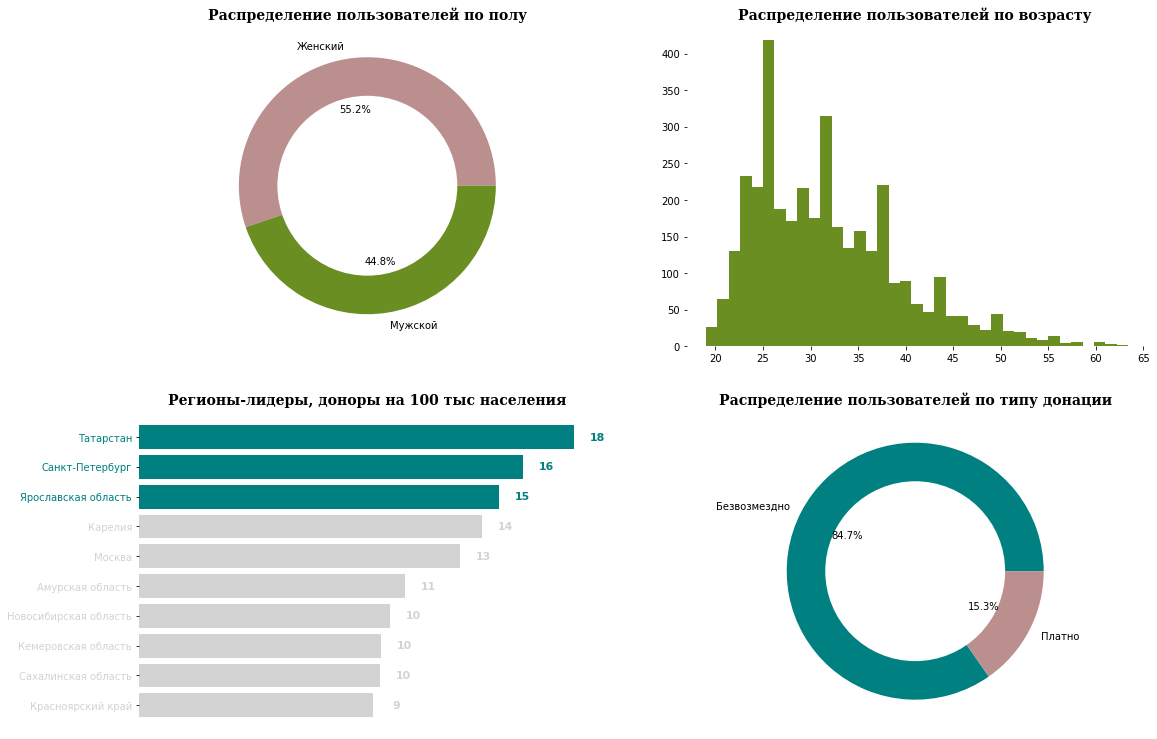


Самые востребованные пункты приема крови

Выездная акция                                                        2614
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»     322
ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)                                     303
КГБУЗ "Красноярский краевой центр крови № 1"                           223
ГБУЗ "Республиканская станция переливания крови"                       198
Центр крови им. Гаврилова (центр на Беговой)                           195
ГБУ "Станция переливания крови" Ростовской области                     167
Центр крови ФМБА России                                                166
ГБУЗ "Новосибирский клинический центр крови"                           165
Городская станция переливания крови Санкт-Петербурга                   158
Name: donation_place, dtype: int64
___________________________________________________________________________________

Обзор сегмента 12

Количество уникальных доноров: 5954
Количество донаций сегмента: 158

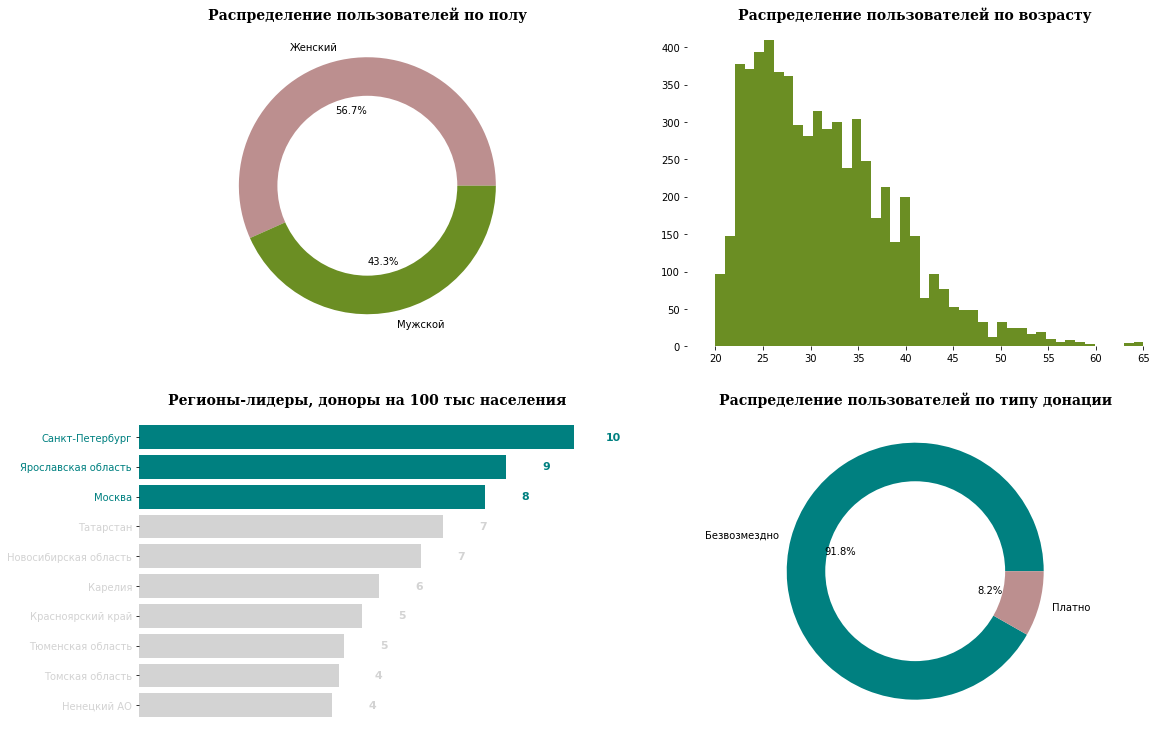


Самые востребованные пункты приема крови

Выездная акция                                                        2356
ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)                                     501
ГБУЗ "Республиканская станция переливания крови"                       343
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»     305
КГБУЗ "Красноярский краевой центр крови № 1"                           304
Центр крови им. Гаврилова (центр на Беговой)                           300
Центр крови ФМБА России                                                271
Городская станция переливания крови Санкт-Петербурга                   270
ГБУЗ "ГКБ № 52", отделение переливания крови                           262
ГБУ "Станция переливания крови" Ростовской области                     259
Name: donation_place, dtype: int64
___________________________________________________________________________________



In [34]:
segments = ['11', '12']

for segment in segments:
    sgm_info(segment)

**Спящие и в зоне риска:**

- преимущественно `женщины`
- `23-38 лет` с последующим постепенным снижением активности по мере увеличения возраста
- `выездная акция` - самый популярная форма сдачи (кол-во донаций в 5-8 раз превышает донации в медицинских учреждениях) 
- `бОльшая доля платных донаций`, чем в других сегментах (возможно для части доноров сдача крови рассматривалась в качестве источника финансовой поддержки в конкретный момент времени)
- в `Татарстане`, `Ярославской обл`, `Петербурге` и `Москве` максимальное количество отточных доноров на 100 тыч населения


**Взаимодействие**: Вероятно потерянные пользователи. Возможно не стоит предпринимать активные действия по их возврату, особенно если цена привлечения выше ожидаемой отдачи. Тем не менее, напоминание об организации, например, через рассылку с перечнем географически релевантных выездных акций может побудить доноров к действию.

##### **2.3.2.2 Чемпионы**

Обзор сегмента 33

Количество уникальных доноров: 4811
Количество донаций сегмента: 111384
Доля донаций от общего количества: 47.88 %



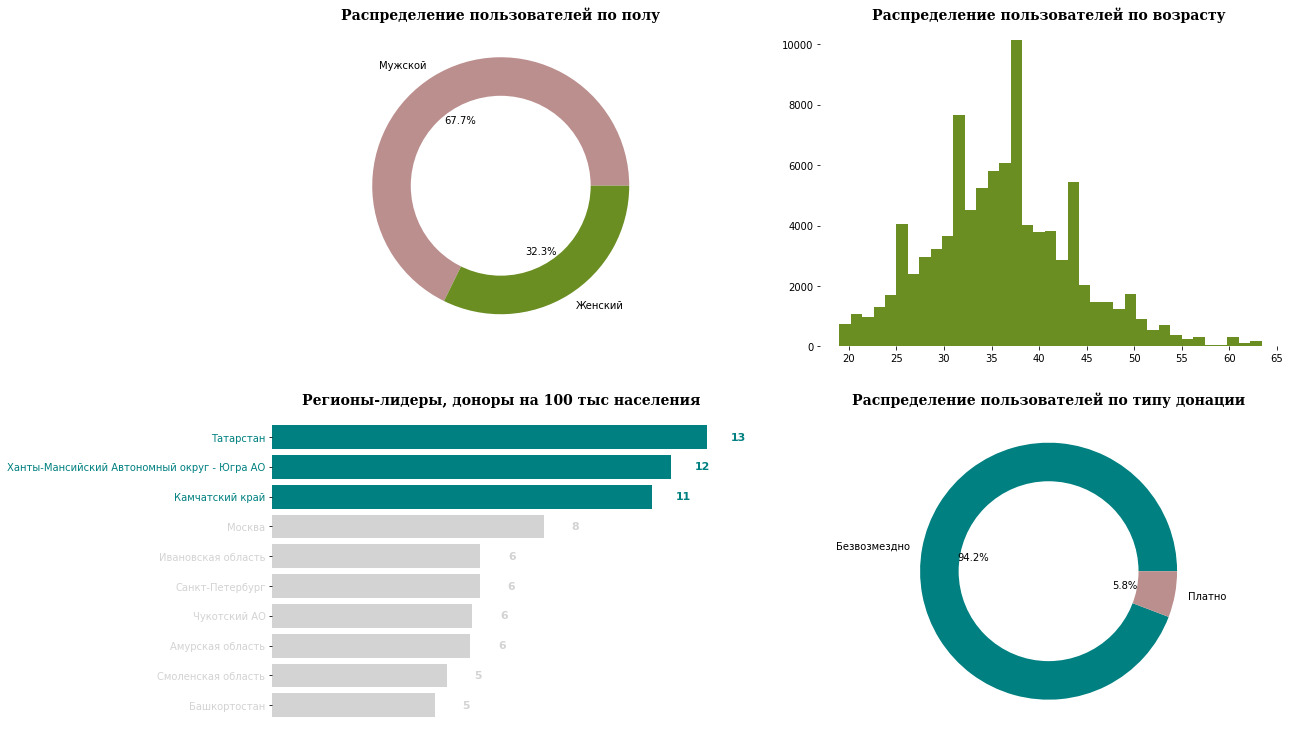


Самые востребованные пункты приема крови

Казанский плазмоцентр ФГБУ РМНПЦ «Росплазма» ФМБА России                  4955
ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)                                        4933
КУ ХМАО - Югры "Станция переливания крови", филиал в г. Нижневартовске    4114
ГБУЗ "Республиканская станция переливания крови"                          3871
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»        3311
Выездная акция                                                            3157
КГБУЗ "Красноярский краевой центр крови № 1"                              2441
Центр крови им. Гаврилова (центр на Беговой)                              2318
ГКУЗ  "Кузбасский центр крови" (Кемеровский областной центр крови)        2318
ГБУЗ "ГКБ № 52", отделение переливания крови                              2225
Name: donation_place, dtype: int64
___________________________________________________________________________________



In [35]:
sgm_info('33')

**Чемпионы:**
- `мужчины`
- активность доноров растет с увеличением возраста, пик `32-37` лет, далее плавное снижение активности
- `94%` донаций `безвозмездно`
- `Татарстан`,  `Ханты-Мансийский АО`, `Камчатский край` лидируют по количеству доноров-чемпионов на 100 тыс начеления
- Популярные медицинские учреждения: `Казанский плазмоцентр ФГБУ РМНПЦ «Росплазма»`, `ФГБУ НМИЦ Гематологии`, `Станция переливания крови (Нижневартовск)`

**Взаимодействие:** Самая надежная категория – много и регулярно сдают. Несмотря на устойчивую лояльность, их необходимо награждать. Этот сегмент можно использовать в качестве фокус группы при внедрении новых продуктов/технологий или для проверки эффективности партнерских программ.

##### **2.3.2.3 Новички и растущие**

Обзор сегмента 31

Количество уникальных доноров: 5250
Количество донаций сегмента: 5250
Доля донаций от общего количества: 2.26 %



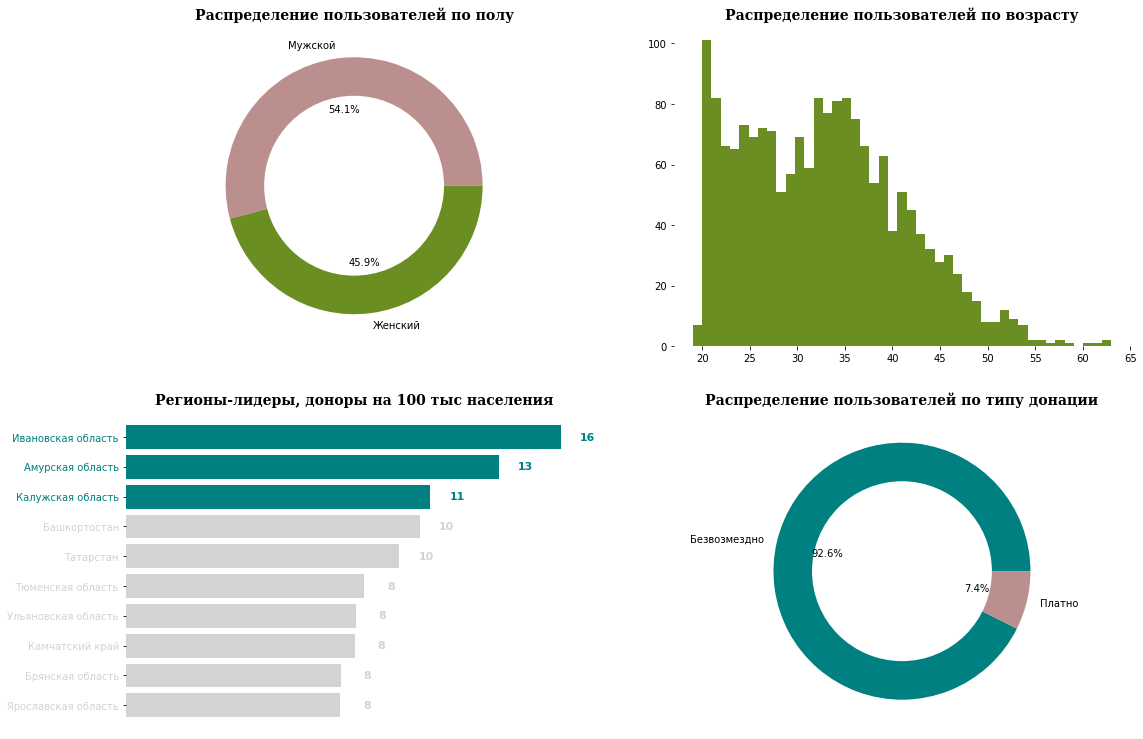


Самые востребованные пункты приема крови

Выездная акция                                                          617
ГБУЗ "Республиканская станция переливания крови"                        308
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»      173
ГБУЗ Тюменской области "Областная станция переливания крови"            111
ГУЗ "Ульяновская областная станция переливания крови"                    96
Казанский плазмоцентр ФГБУ РМНПЦ «Росплазма» ФМБА России                 93
ГБУЗ Амурской области "Амурская областная станция переливания крови"     91
Центр крови им. Гаврилова (центр на Беговой)                             86
Филиал ГБУЗ РСПК в г. Стерлитамак                                        77
Брянская областная станция переливания крови                             74
Name: donation_place, dtype: int64
___________________________________________________________________________________

Обзор сегмента 32

Количество уникальных доноров: 3173
Количество донаций сег

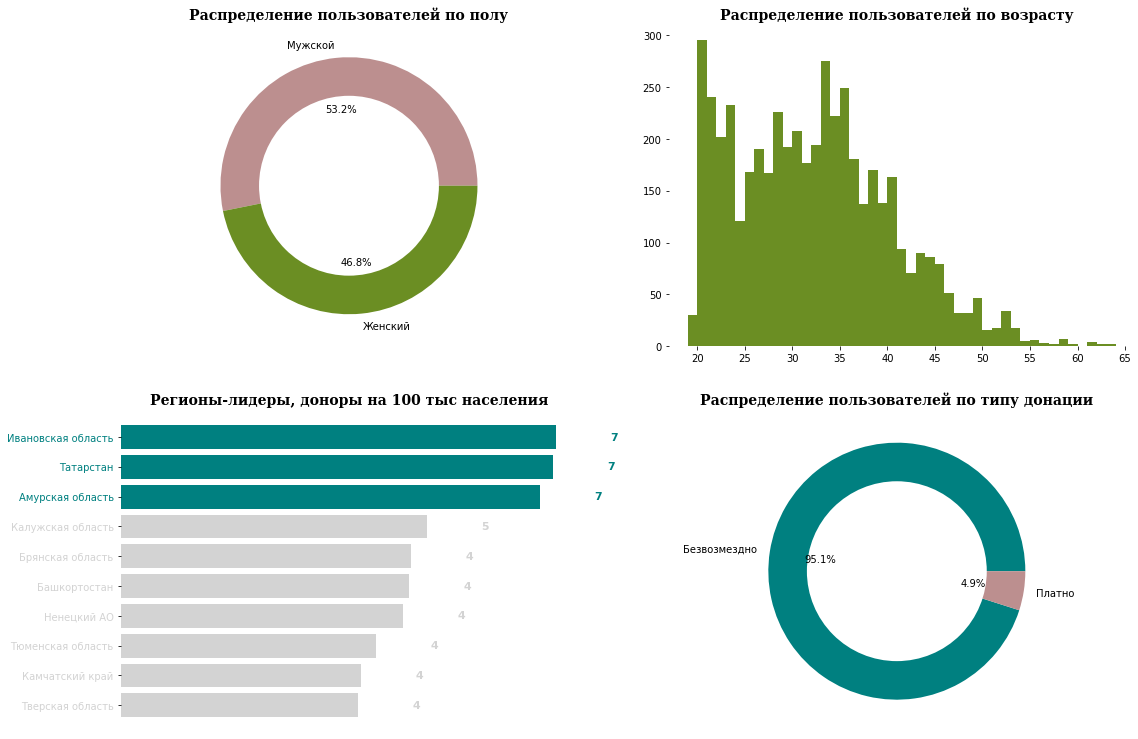


Самые востребованные пункты приема крови

Выездная акция                                                          843
ГБУЗ "Республиканская станция переливания крови"                        364
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»      339
Казанский плазмоцентр ФГБУ РМНПЦ «Росплазма» ФМБА России                224
Центр крови им. Гаврилова (центр на Беговой)                            183
ГБУЗ "Самарская областная станция переливания крови"                    132
ГБУЗ Тюменской области "Областная станция переливания крови"            129
Центр крови им. Гаврилова (центр в Царицыно)                            126
ГБУЗ Амурской области "Амурская областная станция переливания крови"    123
Городская станция переливания крови Санкт-Петербурга                    118
Name: donation_place, dtype: int64
___________________________________________________________________________________



In [36]:
segments = ['31', '32']

for segment in segments:
    sgm_info(segment)

**Новички и растущие:** (весьма широкие сегменты)
- `мужщины и женщины` в почти равных пропорциях
- активны от `20 до 40 лет` 
- `выездные акции` популярны в обоих сегментах, эффективены для взаимодействия с первичными и регулярными донорами 
- `объем платных донаций у сдающих впервые выше`, чем в "растущем сегменте" (кол-во донаций 2-4 в течение года). 
- максимальное количество новичков и перспективных доноров на 100 тыс населения в `Татарстане`, `Ивановской`, `Амурской`, `Калужской обл`. 

**Взаимодействие:** Поскольку оба сегмента - пользователи, недавно совершившие донацию впервые или повторно в течение текущего года, их стоит стимулировать к следующей сдаче. В частности, новичок после первой донации вероятнее всего не адаптировал идею о регулярности процедуры, будет дольше решаться на вторую (если в итоге решится на нее). В этот момент важно проявить о нем заботу (например, направить благодарственное письмо, рекомендации о правильньном восстановлении после донации, пригласить за дополнительной информацией на сайт, поделиться картой мест приема крови и предстоящих выездных акциях в его регионе и т д). То же самое применимо к растущему сегменту: цель - стимулировать новые донации. 

##### **2.3.2.4 Лояльные**

Обзор сегмента 23

Количество уникальных доноров: 1220
Количество донаций сегмента: 24330
Доля донаций от общего количества: 10.46 %



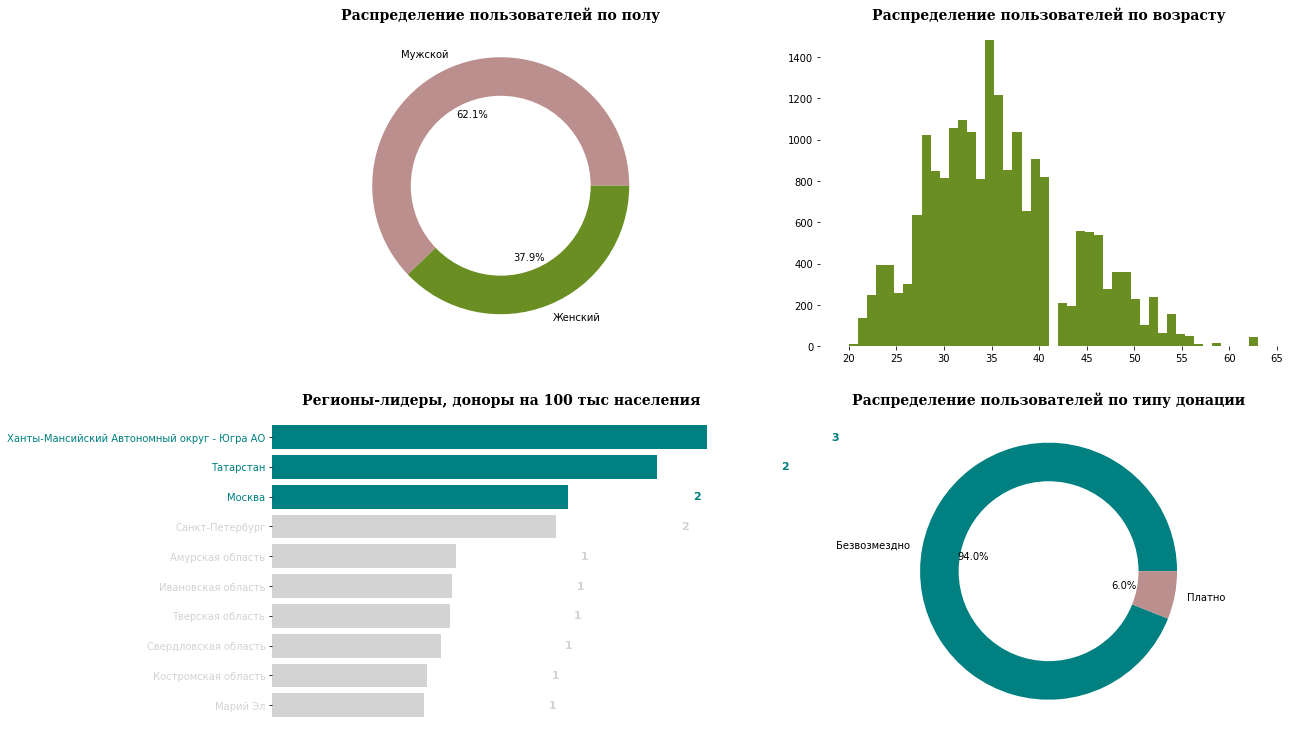


Самые востребованные пункты приема крови

КУ ХМАО-Югры "Станция переливания крови", головное учреждение в г. Сургуте    1246
Казанский плазмоцентр ФГБУ РМНПЦ «Росплазма» ФМБА России                      1040
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»             872
ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)                                             854
Выездная акция                                                                 683
КУ ХМАО - Югры "Станция переливания крови", филиал в г. Нижневартовске         560
ГБУЗ "Республиканская станция переливания крови"                               553
ГАУЗ СО "Областная станция переливания крови" (бывш. "Сангвис")                518
КГБУЗ "Алтайский краевой центр крови"                                          461
ФГБУ «НМИЦ ДГОИ им. Дмитрия Рогачева» Минздрава России                         420
Name: donation_place, dtype: int64
___________________________________________________________________________________



In [37]:
sgm_info('23')

**Лояльные:** 
- `мужчины`
- возраст `28-41`, относительно активны доноры `44-47`
- реuионы-лидеры по количеству лояльных доноров на 100 тыс населения - `Ханты-Мансийский АО`,`Татарстан`, `Москва`
- выездные акции замыкают 5-ку самых популярных локаций для сдачи крови, что говорит о востребованности данного формата во взаимодействии с регулярнвми донорами

**Взаимодействие:** это потенциальные чемпионы, поэтому необходимо поддерживать умеренную коммуникацию (поскольку это уже весьма мотивированный сегмент не стоит слишком часто направлять рассылку), однако приглашения на мероприятия, информация о новых партнерах организации и т д могут подтолкнуть доноров этого сегмента к скорейшей повторной сдаче. `Cамая малочисленная категория`, хотя среднее количество донаций сегмента - 20. Желательно расширить эту категорию

##### **2.3.2.5 Требуют внимания**

Обзор сегмента 13

Количество уникальных доноров: 3659
Количество донаций сегмента: 45572
Доля донаций от общего количества: 19.59 %



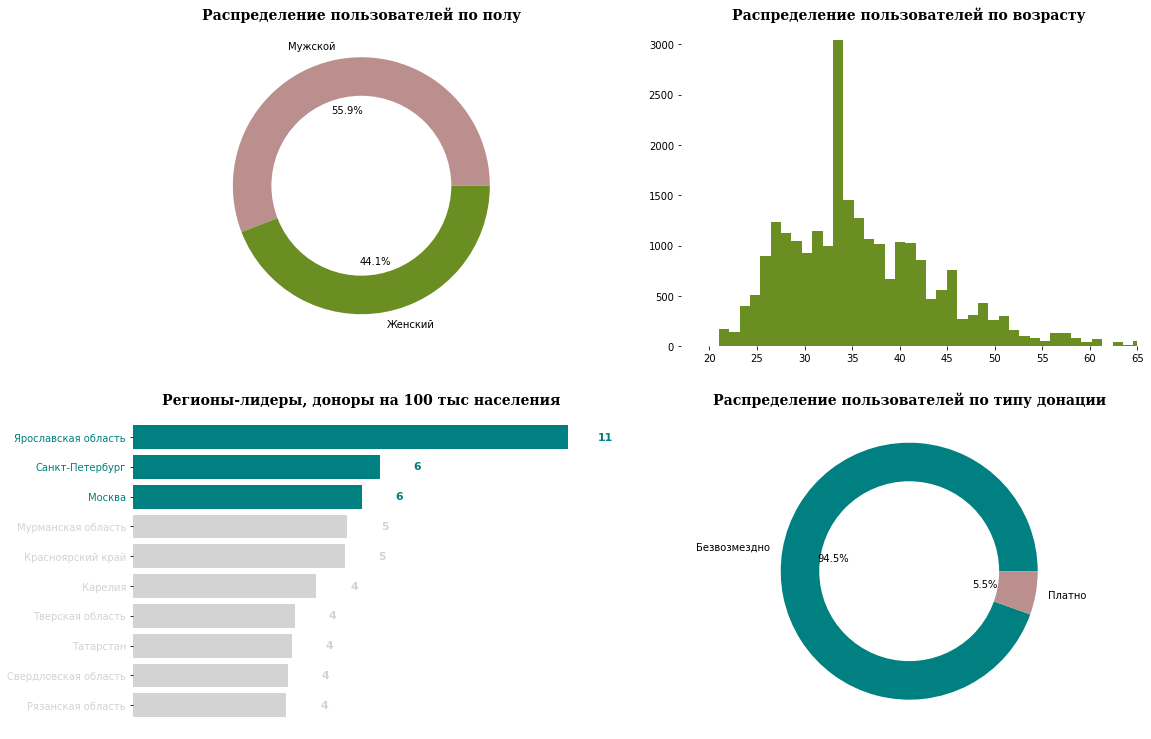


Самые востребованные пункты приема крови

ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)                                 3161
Выездная акция                                                     2751
КГБУЗ "Красноярский краевой центр крови № 1"                       1675
ГУЗ "Ярославская областная СПК"                                    1301
ГАУЗ СО "Областная станция переливания крови" (бывш. "Сангвис")     896
ГБУЗ "ГКБ № 52", отделение переливания крови                        856
ГБУЗ "Самарская областная станция переливания крови"                786
ГБУЗ "Республиканская станция переливания крови"                    749
ФГБУ «НМИЦ ДГОИ им. Дмитрия Рогачева» Минздрава России              712
Центр крови ФМБА России                                             682
Name: donation_place, dtype: int64
___________________________________________________________________________________



In [38]:
sgm_info('13')

**Требуют внимания:** 
- преимущественно `мужчины`
- `от 27 до 43 лет` (значительный всплеск в возрасте `34`)
- `маленькая доля платных донаций` 
- `Ярославская обл`, `Петербург`, `Москва` лидируют количеству требующих внимания доноров
- `выездная акция` - 2й по популярности формат сдачи крови

**Взаимодействие:** Некогда очень активные доноры, не сделавшие ни одной донации за 2 года. Необходимо их реактивировать, восстановить коммуникацию, рассказать о последних новостях организации (мероприятия, знаковые события, бонусы и т д) 

##### **2.3.2.6 Сомневающиеся и на грани**

Обзор сегмента 21

Количество уникальных доноров: 4427
Количество донаций сегмента: 4427
Доля донаций от общего количества: 1.9 %



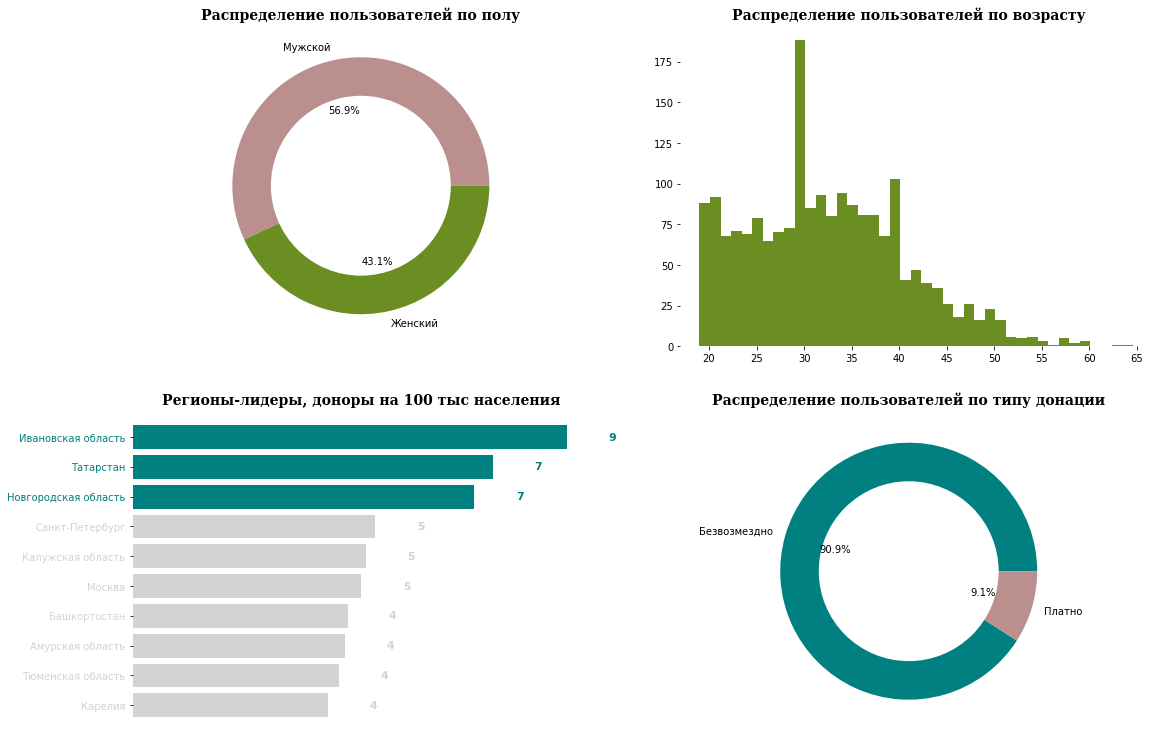


Самые востребованные пункты приема крови

Выездная акция                                                           513
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»       149
ГБУЗ "Республиканская станция переливания крови"                         128
Центр крови им. Гаврилова (центр в Царицыно)                              85
Центр крови им. Гаврилова (центр на Беговой)                              84
Городская станция переливания крови Санкт-Петербурга                      76
ГБУЗ "Самарская областная станция переливания крови"                      61
ГБУЗ Тюменской области "Областная станция переливания крови"              59
ГБУЗ "ГКБ № 52", отделение переливания крови                              58
Филиал ГАУЗ «Республиканский центр крови МЗ РТ» в г. Набережные Челны     57
Name: donation_place, dtype: int64
___________________________________________________________________________________

Обзор сегмента 22

Количество уникальных доноров: 1833
Количество д

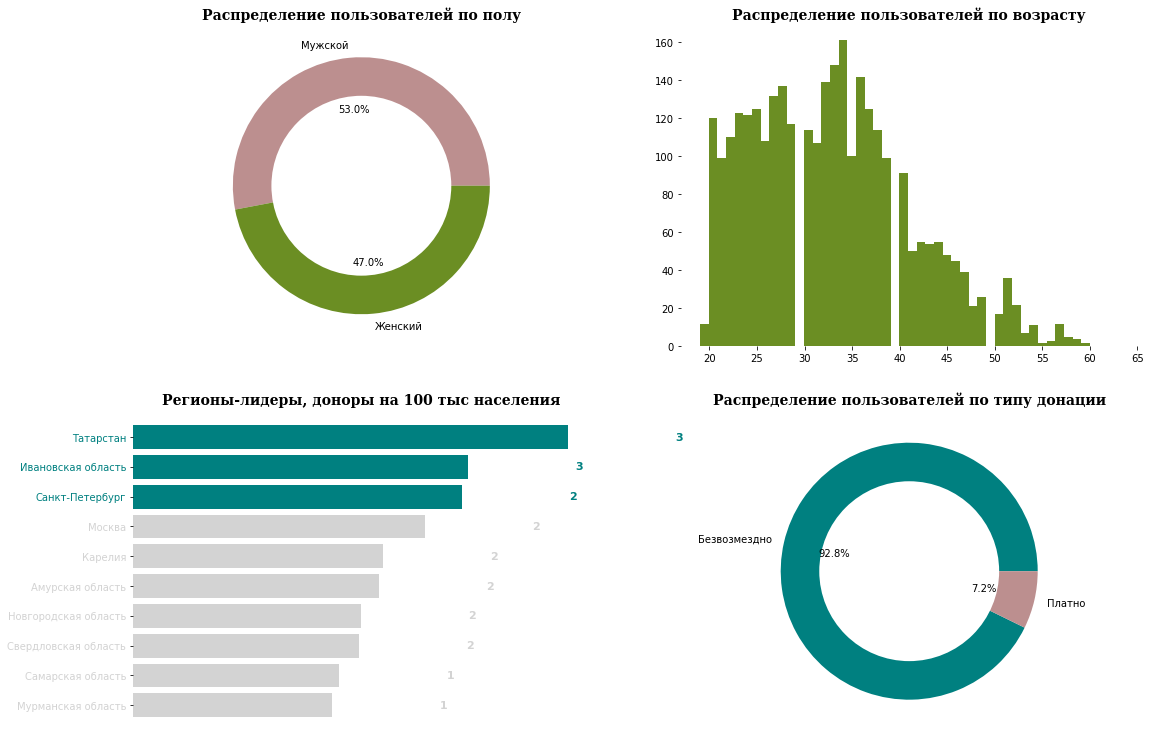


Самые востребованные пункты приема крови

Выездная акция                                                        364
ГАУЗ «Республиканский центр крови Министерства здравоохранения РТ»    208
Центр крови им. Гаврилова (центр на Беговой)                          130
ГБУЗ "Республиканская станция переливания крови"                      100
ГАУЗ СО "Областная станция переливания крови" (бывш. "Сангвис")        96
Центр крови им. Гаврилова (центр в Царицыно)                           95
Городская станция переливания крови Санкт-Петербурга                   95
ГБУЗ "Самарская областная станция переливания крови"                   78
ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)                                     73
ГБУЗ "Новосибирский клинический центр крови"                           69
Name: donation_place, dtype: int64
___________________________________________________________________________________



In [39]:
segments = ['21', '22']

for segment in segments:
    sgm_info(segment)

**Сомневающиеся и на грани:** 
- преимущественно `мужчины` 
- `от 19 до 40 лет`
- `уровень платных донаций выше среднего`, сравним с сегментами оттока (11, 12)
- `выездная акция - самый востребованный формат` сегмента
- в `Татарстане`, `Ивановской` и `Новгородской обл`, `Петербурге` больше всего доноров сегмента в расчете на 100 тыс человек 

**Взаимодействие:** Развивать коммуникацию и взаимодействие, приглашать на мероприятия, рассказывать о бонусах

## 3. Вывод

- С помощью RM-анализа получены 9 сегментов, из которых наиболее широко представлены
    - **спящие** (единичная донация более 2-х лет назад)
    - **в зоне риска** (2-4 донации более 2-х лет назад)
    - **новички** (первичная донация в текущем году)
    - **чемпионы** (максимальное количество донаций, самые свежие из которых сделаны в текущем году)



- Отмечаем `значительное присутствие сегментов близких к оттоку` (спящие и в зоне риска), тем не менее третья по величине категория – новички – при определенной работе может быть конвертирована в растущей сегмент. `«Костяк» донорской базы` – чемпионы - также `относительно хорошо представлен`.

- Из самых производительных сегментов только чемпионы обладают заметным присутствием. Другие `категории «активных» доноров представлены ограниченно`:  требующие внимания (>4 сдач более 2  лет назад, в среднем 12 сдач) и особенно лояльные ( >4 сдач, самые свежие из которых сделаны от года до 2-х лет назад, в среднем 20 сдач на сегмент). Перспективная категория `лояльные – потенциальные чемпионы - представлена хуже всех`.

- Во всех выделенных сегментах, кроме отточных, `мужчины преимущественно сдают больше женщин`. Ожидаемо, повышенная активность доноров отмечается в возрасте `от 20 до 40 лет`.

- Формат `выездной акции эффективен` как для привлечения новых доноров, так в работе с регулярными донорами.

- Самая `большая доля платных донаций в отточных сегментах`. Вероятно для части доноров сдача крови рассматривалась в качестве источника финансовой поддержки в конкретный момент времени.

- Регионы-лидеры по количеству `активных и перспективных доноров` (в расчете на 100 тыс начеления) - `Татарстан`, `Ханты-Мансийский АО`, `Камчатский край`, `Ивановская` и `Амурская обл`, `отточных` - `Татарстан`, `Ярославская обл`, `Петербург` и `Москва`

- `Сфокусировать усилия стоит на всех категориях с самыми недавними донациями` (новички, растущие и чемпионы), а также на `некогда активных и продуктивных категориях`, в которых доноры по каким-либо причинам перестали делать донации (лояльные и требующие внимания)